In [1]:
# -*- coding: utf-8 -*-
"""과제6 Bitcoin prediction

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/13JTL-Gl3aoh8zBX8y5s1RPATm2zad0gD
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv","r")

coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

Saving BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv to BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv


In [2]:
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 4s - loss: 6529.4360 - mae: 6529.4360 - val_loss: 2383.6826 - val_mae: 2383.6826 - 4s/epoch - 18ms/step
Epoch 2/200
250/250 - 2s - loss: 3446.7275 - mae: 3446.7275 - val_loss: 2094.3489 - val_mae: 2094.3489 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 3653.6951 - mae: 3653.6951 - val_loss: 10844.0420 - val_mae: 10844.0420 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 3764.0530 - mae: 3764.0530 - val_loss: 3460.7356 - val_mae: 3460.7356 - 2s/epoch - 6ms/step
Epoch 5/200
250/250 - 2s - loss: 3527.9590 - mae: 3527.9590 - val_loss: 2715.5417 - val_mae: 2715.5417 - 2s/epoch - 6ms/step
Epoch 6/200
250/250 - 2s - loss: 3520.2620 - mae: 3520.2620 - val_loss: 3654.4788 - val_mae: 3654.4788 - 2s/epoch - 7ms/step
Epoch 7/200
250/250 - 2s - loss: 3504.9612 - mae: 3504.9612 - val_loss: 4470.6060 - val_mae: 4470.6060 - 2s/epoch - 8ms/step
Epoch 8/200
250/250 - 2s - loss: 3371.6477 - mae: 3371.6477 - val_loss: 2464.2666 - val_mae: 2464.2666 - 2s/epoch - 7ms/st

In [4]:
# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

손실 함수: 1271.0928955078125 MAE: 1271.0928955078125
평균절댓값백분율오차(MAPE): [0.02456056]


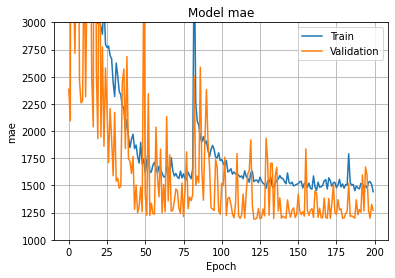

In [12]:
# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([1000,3000])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

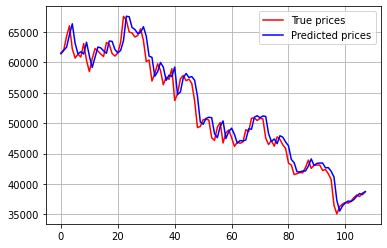

In [7]:
# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

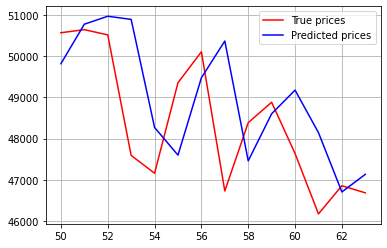

In [9]:
# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

In [14]:
import sys
import tensorflow as tf
print(sys.version)
print(tf.__version__)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
2.8.0
